In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

In [14]:
img_folder = r'E:\Sem-6\Digit_Recognition_Project\Hindi'
data = tf.keras.utils.image_dataset_from_directory(img_folder, image_size=(32, 32), label_mode='categorical')

Found 42000 files belonging to 10 classes.


In [15]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()


c:\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


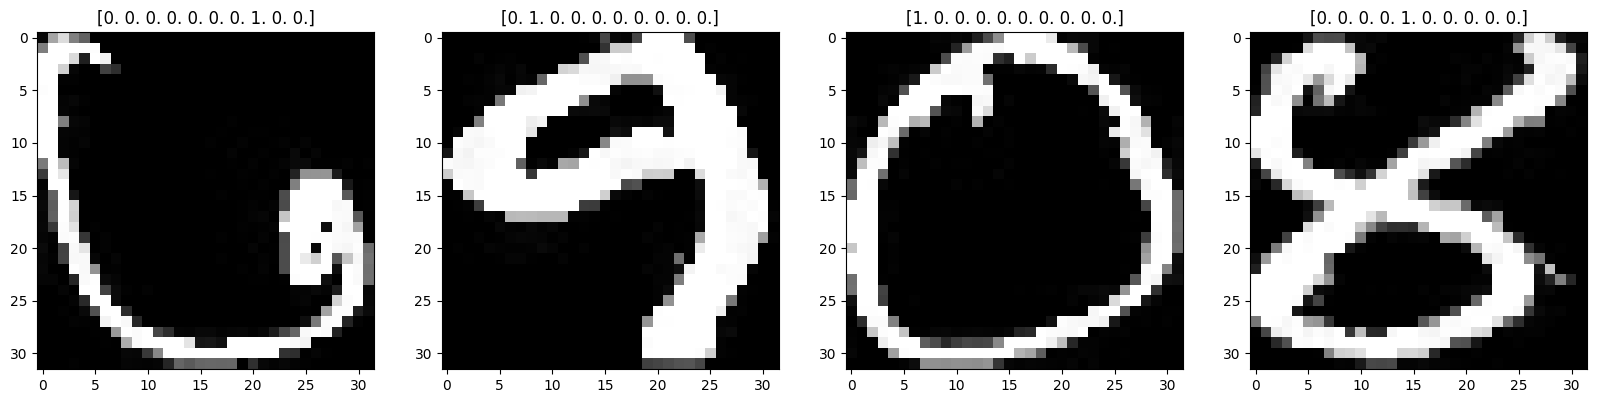

In [4]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

In [16]:
data = data.map(lambda x,y: (x/255, y))
batch = data.as_numpy_iterator().next()

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten,Input,AveragePooling2D,BatchNormalization,Activation
from keras.callbacks import ReduceLROnPlateau
from keras import Sequential


In [18]:
input1 = Input(shape=(32, 32, 3))

In [19]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5),input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=120, kernel_size=(5,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(84))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [20]:
model.summary()
reduceLROnPlateau = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3,
                                verbose=1, 
                                factor=0.5,
                                min_lr=0.00001)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 6)        24        
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 28, 28, 6)         0         
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 batch_normalization_6 (Batc  (None, 10, 10, 16)      

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(train, epochs=3, validation_data=val, callbacks=[reduceLROnPlateau])

Epoch 1/3
919/919 [==============================] - 118s 126ms/step - loss: 0.3964 - accuracy: 0.9413 - val_loss: 0.1685 - val_accuracy: 0.9779 - lr: 0.0010
Epoch 2/3
919/919 [==============================] - 54s 58ms/step - loss: 0.1783 - accuracy: 0.9712 - val_loss: 0.0780 - val_accuracy: 0.9860 - lr: 0.0010
Epoch 3/3
919/919 [==============================] - 62s 67ms/step - loss: 0.1159 - accuracy: 0.9795 - val_loss: 0.0688 - val_accuracy: 0.9846 - lr: 0.0010


In [22]:
model.save('Hindi_Lenet_Model.h5')